## Yahoo Finance Integration

### Informações:
pip install yfinance
pip install mplfinance



References:

https://towardsdatascience.com/free-stock-data-for-python-using-yahoo-finance-api-9dafd96cad2e

https://medium.com/@rodrigobercinimartins/como-extrair-dados-da-bovespa-sem-gastar-nada-com-python-14a03454a720

https://pypi.org/project/yfinance/

https://algotrading101.com/learn/yfinance-guide/

https://blog.quantinsti.com/historical-market-data-python-api/

https://towardsdatascience.com/historical-stock-price-data-in-python-a0b6dc826836

https://www.learndatasci.com/tutorials/python-finance-part-yahoo-finance-api-pandas-matplotlib/

Código dos Ativos: https://finance.yahoo.com/quote/%5EBVSP/components/

mplfinance: https://github.com/matplotlib/mplfinance

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mpdates
import mplfinance as mpf
from mplfinance.original_flavor import candlestick_ohlc

import yfinance as yf

### Coletar dados de uma ação específica

In [2]:
stock = yf.Ticker("PETR4.SA")

# get stock info
#print(stock.info)

# get historical market data
hist = stock.history(period="5y")

hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2016-04-11,7.783424,7.783424,7.783424,7.783424,449600,0.0,0
2016-04-12,8.386431,8.386431,8.386431,8.386431,648900,0.0,0
2016-04-13,8.803896,8.803896,8.803896,8.803896,782300,0.0,0
2016-04-14,9.026544,9.063653,8.460646,8.497754,77355500,0.0,0
2016-04-15,8.581248,9.119316,8.414262,8.989437,95590000,0.0,0
...,...,...,...,...,...,...,...
2021-04-05,24.129999,24.200001,23.680000,24.040001,40454400,0.0,0
2021-04-06,24.180000,24.370001,23.910000,24.020000,45934300,0.0,0
2021-04-07,23.940001,24.340000,23.930000,24.000000,55892200,0.0,0


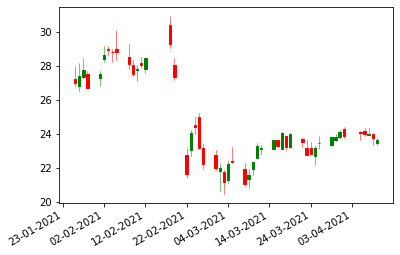

Done.


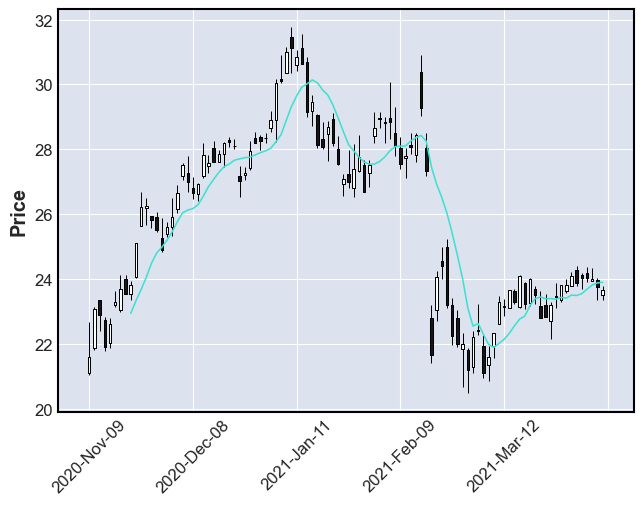

In [3]:
def plot_p(df):
    
    fig, ax = plt.subplots()
    candlestick_ohlc(ax,
                      df.values,
                      width=0.6,
                      colorup='g',
                      colordown='r',
                      alpha=1)
    
    #Plotting Line over the Dataframe
    if ('MME' in df.columns):
        df['MME'].plot(ax=ax)
    
    #Formatting Date
    date_format = mpdates.DateFormatter('%d-%m-%Y')
    ax.xaxis.set_major_formatter(date_format)
    fig.autofmt_xdate()
    
    plt.show()
    print('Done.') 
    
    
df = hist.tail(50)  

#Remove unecessary columns
df = df.drop(columns=['Dividends', 'Stock Splits'])

#Add a column to Time
df['t'] = df.index.values
df['t'] = pd.to_datetime(df['t'])
df['t'] = df['t'].map(mpdates.date2num)

#Reorder the columns: it's important to the plotting method.
df = df[['t', 'Open', 'High', 'Low', 'Close']]

plot_p(df)

mpf.plot(hist.tail(100),type='candle', mav=9)
    

In [4]:
def calculateMME(df, n):
    """
    returns an n period exponential moving average for
    the time series s

    df is the original dataframe - it needs to contain a 'Close' named column
    n is the number of periods to consider in the calculus

    returns a dataframe with a new column containing the MME
    """
    
    k  = 2 / (n + 1)
    
    df['MME'] = df['Close'] 
    
    df['MME'].iloc[n] = df['Close'].iloc[0:n-1].mean()

    for i in range(n, len(df)):
        df['MME'].iloc[i]  = (df['Close'].iloc[i] - df['MME'].iloc[i - 1])*k +  df['MME'].iloc[i-1]

    return df

C:\Users\Adrion\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


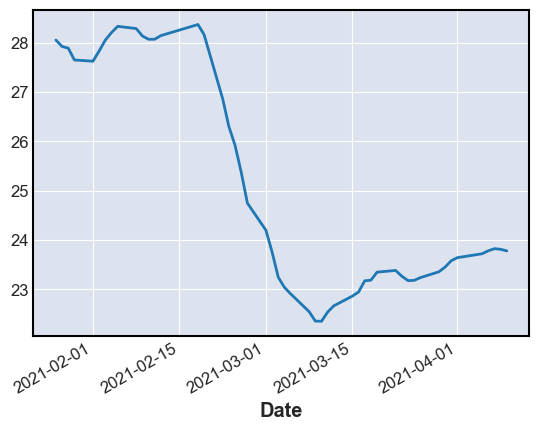

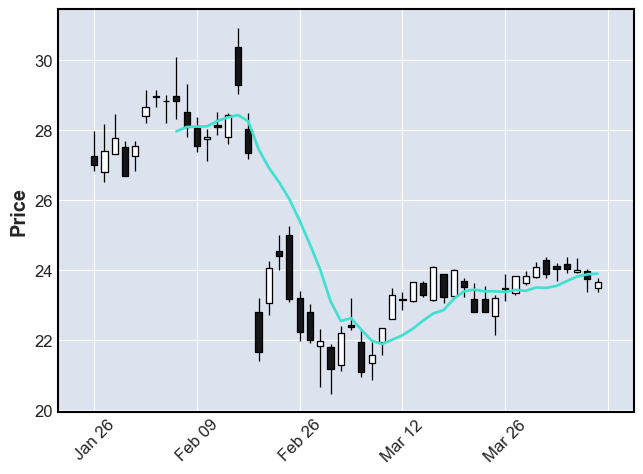

<function mplfinance.plotting.plot(data, **kwargs)>

In [5]:
'''n = 9
test = hist.tail(20)
k  = 2 / (n + 1)

test['MME'] = test['Close']

for i in range(n, len(test)):
    test['MME'].iloc[i]  = (test['Close'].iloc[i] - test['MME'].iloc[i - 1])*k +  test['MME'].iloc[i-1]'''

test = calculateMME(hist, 9)

test.tail(50).MME.plot()
mpf.plot(hist.tail(50),type='candle', mav=9)

mpf.plot

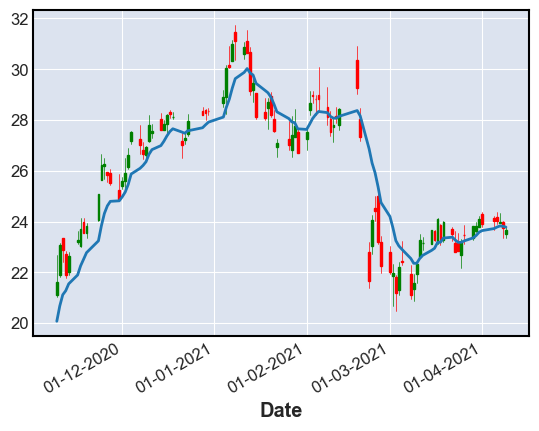

Done.


In [6]:
df = test.tail(100)  

#Remove unecessary columns
df = df.drop(columns=['Dividends', 'Stock Splits'])

#Add a column to Time
df['t'] = df.index.values
df['t'] = pd.to_datetime(df['t'])
df['t'] = df['t'].map(mpdates.date2num)

#Reorder the columns: it's important to the plotting method.
df = df[['t', 'Open', 'High', 'Low', 'Close', 'MME']]

plot_p(df)

In [12]:
stock = yf.Ticker("MGLU3.SA")

# get stock info
#print(stock.info)

# get historical market data
hist = stock.history(period="5y")

currentSplit = 1

for i in range(n, len(hist)):
    if currentSplit <> 1 or df['Stock Split'].iloc[i] <> 0:
        if df['Stock Split'].iloc[i] <> 0:
            currentSplit
    
    
    

                 Open       High        Low      Close    Volume  Dividends  \
Date                                                                          
2020-04-16  11.086293  11.421488  10.974561  11.314722  58323600        0.0   
2020-04-17  11.590329  11.642470  10.900074  11.071396  48467600        0.0   
2020-04-20  10.855381  12.054637  10.738683  12.037256  79855600        0.0   
2020-04-22  12.290515  12.955941  12.191197  12.551223  89495600        0.0   
2020-04-23  12.876487  13.035395  12.062086  12.283067  70189600        0.0   
...               ...        ...        ...        ...       ...        ...   
2021-04-05  20.600000  20.730000  19.930000  20.420000  27289400        0.0   
2021-04-06  20.340000  20.719999  20.059999  20.600000  26541200        0.0   
2021-04-07  20.500000  20.530001  20.030001  20.180000  25362800        0.0   
2021-04-08  20.230000  21.900000  20.209999  21.850000  56482000        0.0   
2021-04-09  21.650000  22.020000  21.600000  21.6700

In [19]:
stock = yf.Ticker("MGLU3.SA")

# get stock info
#print(stock.info)

# get historical market data
hist = stock.history(period="5y")

#Add a column to Time
hist['t'] = hist.index.values
hist['t'] = pd.to_datetime(hist['t'])
hist['t'] = hist['t'].map(mpdates.date2num)

hist[hist['Stock Splits'] != 0]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,t
Date,,,,,,,,
2017-09-05,2.392285,2.591442,2.356292,2.459470,95350400,0.0,8.0,17414.0
2019-08-06,8.662207,9.019989,8.647604,8.908030,69824400,0.0,8.0,18114.0
2020-10-14,26.472429,27.221648,25.013949,25.653282,83598100,0.0,4.0,18549.0


In [30]:
hist[(hist['t'] > 18540) & (hist['t'] < 18599)]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,t
Date,,,,,,,,
2020-10-06,22.726330,22.776277,22.191887,22.301773,42778000,0.0,0.0,18541.0
2020-10-07,22.401669,22.668891,22.201878,22.211868,41633600,0.0,0.0,18542.0
2020-10-08,22.426644,22.976071,22.251825,22.943605,46569200,0.0,0.0,18543.0
2020-10-09,22.951098,24.511972,22.876175,24.511972,92367600,0.0,0.0,18544.0
2020-10-13,24.856612,26.072846,24.849120,25.972950,94711200,0.0,0.0,18548.0
2020-10-14,26.472429,27.221648,25.013949,25.653282,83598100,0.0,4.0,18549.0
2020-10-15,24.993970,26.042876,24.973990,25.483459,34750000,0.0,0.0,18550.0
2020-10-16,25.733200,26.022897,25.133824,25.773157,32673100,0.0,0.0,18551.0
2020-10-19,26.082836,26.272637,25.323626,25.663273,36433600,0.0,0.0,18554.0
